#### Office Hours 5 Tips: 

Including a subset of materials covered in office Hours notes to help with HW 5


- alpha term (Ada Boost) 

- majority vote - classification (Ada Boost)

- Randomized Search CV 

##### Ada Boost - Alpha term: 

- How much should we trust any specific classifier? 
     - The `alpha` dictates how much weight we apply to the classifier (plot below) at the end, and also helps with how we handle weights for subsequent classifiers  (source: Elements of Statistical Learning, Ch. 10.1)

$$ \alpha_{m}  = \log((1-err_{m})/err_{m})$$

Let's do a quick example: 

- Classifier 1 (m = 1) had an error of 0.45

- Classifier 2 (m = 2) had a better error of 0.25

In [9]:
import numpy as np

# classifier 1
err_1 = 0.45
alpha_1 = np.log((1-err_1)/err_1)
print("The alpha term for Classifier 1 is {}".format(alpha_1))

# classifier 2
err_2 = 0.25
alpha_2 = np.log((1-err_2)/err_2)
print("The alpha term for Classifier 2 is {}".format(alpha_2))

The alpha term for Classifier 1 is 0.20067069546215124
The alpha term for Classifier 2 is 1.0986122886681098


Notice how much higher the alpha value is for Classifier 2. This means classifier 2 will get more "say" in the final class of a prediction when we get to majority voting. 

#####  Majority Vote in Ada Boost: Classification 

From ESL: 

$$ G(x) = sign[\sum\limits_{m=1}^m \alpha_{m}G_{m}(x)] $$

Let's break the final prediction down: 

- This is the output for "Discrete AdaBoost"
- Each G(m) model is going to predict either 1 or -1
- The weight of the prediction is based on the alpha term:
    - Recall that a low error =  high alpha
    - So "weak learners" that predict better get more say in the final vote
- Since we get a discrete output, the prediction just takes the sign of the final output (i.e. negative or positive class) 

In [10]:
# example: let's say we had 4 models for predicting an observation

# predicted class across models
mod_preds = np.asarray((1,1,-1,1))

# alpha value - how much do we trust the model?
mod_alpha = np.asarray((0.4,2.8,0.5,0.7))

# calculation of final prediction
ans = np.sum(mod_preds*mod_alpha)
print("Final answer is {}".format(round(ans,2)))

# we just use 'sign' to then predict a class of '1'
print("We predict this observation is of class {}".format(np.sign(ans)))

Final answer is 3.4
We predict this observation is of class 1.0


Let's see what happens if classifier 3 (which predicts a negative class) has a greater alpha term while other classifiers are reduced. 

In [11]:
# alpha value - how much do we trust the model?
mod_alpha = np.asarray((0.4,0.2,4.5,0.2))

# calculation of final prediction
ans = np.sum(mod_preds*mod_alpha)
print("Final answer is {}".format(round(ans,2)))

# we just use 'sign' to then predict a class of '1'
print("We predict this observation is of class {}".format(np.sign(ans)))

Final answer is -3.7
We predict this observation is of class -1.0


##### Randomized Search CV: 

- Example of implementation in sklearn 

- For more detailed information & a few examples of the value of Randomized Search, please review the following paper: http://www.jmlr.org/papers/volume13/bergstra12a/bergstra12a.pdf

In [12]:
# libraries used 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, auc
from sklearn import datasets

# pull in sklearn data
breast_cancer = datasets.load_breast_cancer()
X = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names) # separate step for sklearn data, don't worry

y = breast_cancer.target

# generate train / test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)


# build a baseline model to use in grid search later
rf_obj=RandomForestClassifier(random_state=42)

In [13]:
# Create our grid - this time we will make it much larger since we are using Random Search 
# n_estimators from 100-1400 in steps of 100 
# max_features: 2-15 by 1s
# max_depth: 1-4 in steps of 1
param_grid = {'n_estimators':np.arange(100,1500,100),
              'max_features':np.arange(2,16,1),
             'max_depth': np.arange(1,5,1),
             }

In [14]:
param_grid

{'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000, 1100,
        1200, 1300, 1400]),
 'max_features': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 'max_depth': array([1, 2, 3, 4])}

In [15]:
# scoring = roc auc is good for classifiers 
random_search = RandomizedSearchCV(rf_obj, param_distributions=param_grid, cv = 5, scoring='roc_auc', n_jobs=-1, verbose=3, random_state=1001 )

# fit each model - scored based on cross-validation accuracy
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   33.7s finished


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000, 1100,
       1200, 1300, 1400]), 'max_features': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]), 'max_depth': array([1, 2, 3, 4])},
          pre_dispatch='2*n_jobs', random_state=1001, refit=True,
          return_train_score='warn', scoring='roc_auc', verbose=3)

In [16]:
# see our best performing model: 
random_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features=9, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=800, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

##### Building out AUC Curve: 

Adapted from: 

- https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html#sphx-glr-auto-examples-model-selection-plot-roc-crossval-py



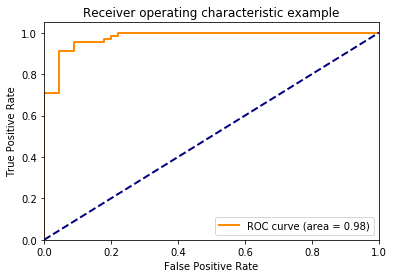

In [23]:
# generate array of probabilities across all classes; [:,0] = negative, [:,1] = positive
probas_ = random_search.best_estimator_.predict_proba(X_test)

# generate fpr, tpr  at various thresholds for Class == 1 (positive case)
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])

# roc value for classifier class == 1
roc_auc = auc(fpr, tpr)

# the actual plotting
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) # classifier curve
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--') # this represents random guessing 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()